# **Assignment 2**

## **Import Libraries & Data file**

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Time recording Segment

In [ ]:
import time
from datetime import datetime
import pytz
start_time = time.time()  # Record the starting time

### Load Data

In [ ]:
# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/SparrowChang/CS6375_assignment1/main/auto%2Bmpg/auto-mpg.data'  # Replace with the actual path to the dataset

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(url, delimiter='\s+', header=None)

# Create a mapping dictionary for column name changes
column_mapping = {0: 'mpg',
                  1: 'cylinders',
                  2: 'displacement',
                  3: 'horsepower',
                  4: 'weight',
                  5: 'acceleration',
                  6: 'model year',
                  7: 'origin',
                  8: 'car name'}
# Rename the columns using the mapping dictionary
df = df.rename(columns=column_mapping)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## **Data Preprocessing**

### Simple Data Loader Method Implementation.

In [ ]:
def data_loader(df):
  # Step 2: Pre-processing
  # Convert categorical variables to numerical variables (if applicable)
  df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
  del df['car name']
  scaler = MinMaxScaler()
  normalized_df = df.copy()
  normalized_df.iloc[:, 1:] = scaler.fit_transform(normalized_df.iloc[:, 1:])
  # Remove null or NA values
  normalized_df = normalized_df.dropna()
  # Remove redundant rows
  normalized_df = normalized_df.drop_duplicates()
  sns.distplot(normalized_df['mpg'])
  # Step 2: Pre-processing about abs() correlation matrix
  # Calculate the correlation matrix
  corr_matrix = normalized_df.corr()

  # Take the absolute values of the correlation matrix
  abs_corr_matrix = corr_matrix.abs()

  # Sort the correlation matrix by a specific column
  sort_column = 'mpg'
  sorted_abs_corr_matrix = abs_corr_matrix.sort_values(by=sort_column, ascending=False)

  # Create a correlation heatmap for the sorted matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(sorted_abs_corr_matrix, annot=True, cmap='coolwarm')
  plt.title('Sorted Correlation Heatmap')
  plt.show
  # Step 3: Split the dataset into training and test sets
  X = normalized_df.iloc[:, 1:]
  X = np.column_stack((np.ones(len(X)), X))
  y = normalized_df.iloc[:, 0]
  y = y.values.reshape((len(y), 1))
  # Split the dataset into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

### Using Data Loader to Load Data and brief data distribution showcase.

<ipython-input-5-a8f6a20a5ebc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df['mpg'])


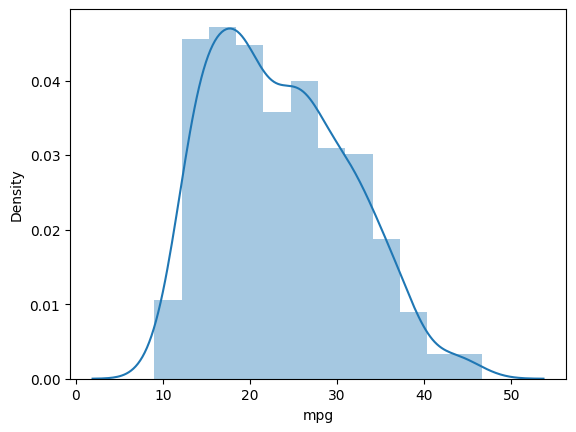

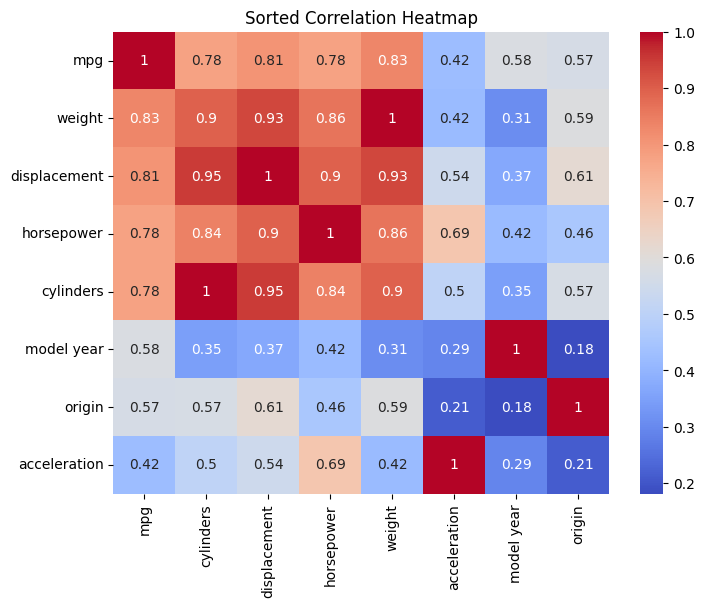

In [ ]:
X_train, X_test, y_train, y_test = data_loader(df)

## **Function Impletmentation**

### Activation function and backward/forward feed method defination.

In [ ]:
# Step 4: To define Activation Functions
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Step 5: To define Neural Network Class
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1

        # Apply activation function to the hidden layer
        if self.activation == 'sigmoid':
            self.a1 = sigmoid(self.z1)
        elif self.activation == 'tanh':
            self.a1 = tanh(self.z1)
        elif self.activation == 'relu':
            self.a1 = relu(self.z1)

        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.z2  # Since it's a regression problem, no activation on output

        return self.output

    def backward(self, X, y, output):
        # Compute the loss and the derivative of the loss with respect to output
        loss = np.mean((output - y)**2)
        d_loss_output = 2 * (output - y) / X.shape[0]

        # Backpropagate the error
        if self.activation == 'sigmoid':
            d_output_z2 = sigmoid_derivative(output)
            d_loss_z2 = d_loss_output * d_output_z2
            d_loss_a1 = np.dot(d_loss_z2, self.W2.T)
            d_loss_z1 = d_loss_a1 * sigmoid_derivative(self.a1)
        elif self.activation == 'tanh':
            d_output_z2 = tanh_derivative(output)
            d_loss_z2 = d_loss_output * d_output_z2
            d_loss_a1 = np.dot(d_loss_z2, self.W2.T)
            d_loss_z1 = d_loss_a1 * tanh_derivative(self.a1)
        elif self.activation == 'relu':
            d_output_z2 = relu_derivative(output)
            d_loss_z2 = d_loss_output * d_output_z2
            d_loss_a1 = np.dot(d_loss_z2, self.W2.T)
            d_loss_z1 = d_loss_a1 * relu_derivative(self.a1)

        # Compute the gradients
        d_loss_W2 = np.dot(self.a1.T, d_loss_z2)
        d_loss_b2 = np.sum(d_loss_z2, axis=0, keepdims=True)
        d_loss_W1 = np.dot(X.T, d_loss_z1)
        d_loss_b1 = np.sum(d_loss_z1, axis=0, keepdims=True)

        return loss, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2

    def update_weights(self, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2, learning_rate):
        # Update weights and biases using gradient descent
        self.W1 -= learning_rate * d_loss_W1
        self.b1 -= learning_rate * d_loss_b1
        self.W2 -= learning_rate * d_loss_W2
        self.b2 -= learning_rate * d_loss_b2

    def train(self, X, y, learning_rate, num_epochs, tolerance):
        for epoch in range(num_epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            loss, d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2 = self.backward(X, y, output)

            # Update weights and biases
            self.update_weights(d_loss_W1, d_loss_b1, d_loss_W2, d_loss_b2, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.2f}')

            # check if the loss is below the tolerance level
            if loss < tolerance:
                print('Traning converaged!')
                break

        print('Training completed!')

    def predict(self, X):
        output = self.forward(X)
        return output

### hyperparameters

In [ ]:
# Step 6: To set up Neural Network model
# Create an instance of the NeuralNetwork class
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
tolerance = 0.001

iteration_range = [100, 500, 1000]
learning_rate_range = [0.001, 0.01, 0.1, 0.5]
activ = ['sigmoid', 'tanh', 'relu']

## **Training & Testing**

### Using Sigmoid Activation Function

In [ ]:
# activ[0]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Step 7: train and evaluate test result
log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'w') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[0])
            log_file.write(f'{activ[0]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[0])

            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)

            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))

            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))

            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')

            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}

            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)

    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

sigmoid
Epoch 100/100, Loss: 426.05
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 425.61, Train Accuracy: 19.10, Test Loss: 387.10, Test Accuracy: 18.38
-----------------
sigmoid
Epoch 100/500, Loss: 471.95
Epoch 200/500, Loss: 396.91
Epoch 300/500, Loss: 376.07
Epoch 400/500, Loss: 363.83
Epoch 500/500, Loss: 355.19
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 355.12, Train Accuracy: 17.36, Test Loss: 318.32, Test Accuracy: 16.60
-----------------
sigmoid
Epoch 100/1000, Loss: 411.87
Epoch 200/1000, Loss: 385.82
Epoch 300/1000, Loss: 371.51
Epoch 400/1000, Loss: 361.69
Epoch 500/1000, Loss: 354.24
Epoch 600/1000, Loss: 348.26
Epoch 700/1000, Loss: 343.27
Epoch 800/1000, Loss: 339.00
Epoch 900/1000, Loss: 335.27
Epoch 1000/1000, Loss: 331.96
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 331.93, Train Accuracy: 16.20, Test Loss: 301.85, Test Accuracy: 15.65
-----------------
sigmoid
Epoch 100/100, Loss: 328.18


### Ploting and Logging for Sigmoid

best_train_MSE
[78.94761913902771, 223.86138691132396, 100.23925472471862]
best_test_MSE
[72.44007143713237, 199.36801289711642, 97.26171972711548]


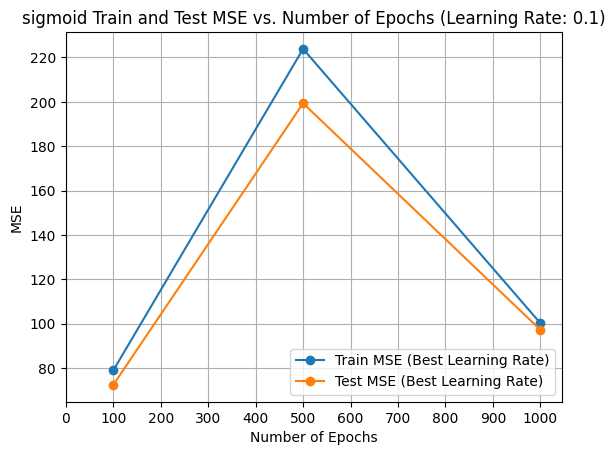

In [ ]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[0]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[0] + '.png', dpi=150, bbox_inches='tight')

plt.show()

### Using tanh Activation Function

In [ ]:
# activ[1]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'a') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[1])
            log_file.write(f'{activ[1]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[1])

            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)

            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))

            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))

            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')

            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}

            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)

    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

tanh
Epoch 100/100, Loss: 405.71
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 405.55, Train Accuracy: 18.72, Test Loss: 360.46, Test Accuracy: 17.77
-----------------
tanh
Epoch 100/500, Loss: 402.91
Epoch 200/500, Loss: 391.57
Epoch 300/500, Loss: 385.11
Epoch 400/500, Loss: 380.58
Epoch 500/500, Loss: 377.10
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 377.07, Train Accuracy: 17.79, Test Loss: 330.48, Test Accuracy: 16.75
-----------------
tanh
Epoch 100/1000, Loss: 282.79
Epoch 200/1000, Loss: 274.10
Epoch 300/1000, Loss: 269.49
Epoch 400/1000, Loss: 266.35
Epoch 500/1000, Loss: 263.98
Epoch 600/1000, Loss: 262.07
Epoch 700/1000, Loss: 260.47
Epoch 800/1000, Loss: 259.10
Epoch 900/1000, Loss: 257.90
Epoch 1000/1000, Loss: 256.83
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 256.82, Train Accuracy: 14.73, Test Loss: 210.40, Test Accuracy: 13.39
-----------------
tanh
Epoch 100/100, Loss: 171.55
Training com

### Ploting and Logging for tanh

best_train_MSE
[171.46702919695278, 245.24660923875163, 225.0376611916467]
best_test_MSE
[131.8711878906228, 205.80478728822155, 204.81799548151122]


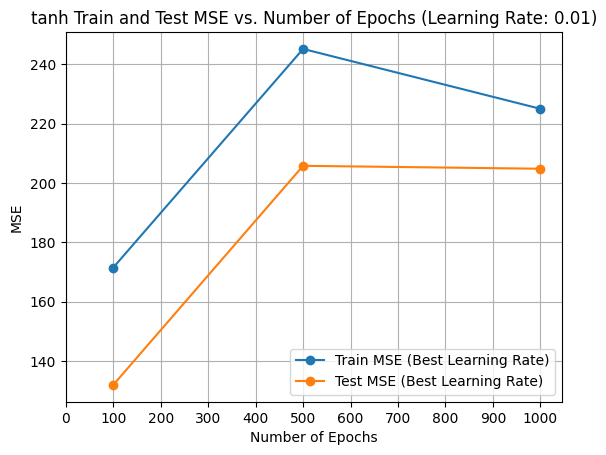

In [ ]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[1]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[1] + '.png', dpi=150, bbox_inches='tight')

plt.show()

### Using ReLu Activation Function

In [ ]:
# activ[2]
best_error = float('inf')
best_params = {}
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

log_file_path = 'path_to_log_file.txt'  # Replace with the actual path to the log file
with open(log_file_path, 'a') as log_file:
    for learning_rate in learning_rate_range:
        for num_epochs in iteration_range:
            # Create an instance of the NeuralNetwork class
            print(activ[2])
            log_file.write(f'{activ[2]} ')
            model = NeuralNetwork(input_size, hidden_size, output_size, activation=activ[2])

            # Train the model
            model.train(X_train, y_train, learning_rate, num_epochs, tolerance)

            # Evaluate the model
            train_predictions = model.predict(X_train).flatten()
            train_loss = np.mean((train_predictions - y_train.flatten())**2)
            train_accuracy = np.mean(np.abs(train_predictions - y_train.flatten()))

            test_predictions = model.predict(X_test).flatten()
            test_loss = np.mean((test_predictions - y_test.flatten())**2)
            test_accuracy = np.mean(np.abs(test_predictions - y_test.flatten()))

            print(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
            print(f'-----------------')

            # Write the results to the log file
            log_file.write(f'Learning Rate: {learning_rate}, Num Epochs: {num_epochs}, Train Loss: {train_loss:.2f}, Train Accuracy: {train_accuracy:.2f}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}\n')
            log_file.write(f'-----------------\n')

            # Check if current parameters yield the best error
            if test_loss < best_error:
                best_error = test_loss
                best_params = {'learning_rate': learning_rate, 'num_epochs': num_epochs}

            # Save loss and accuracy values for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

    print("Best Mean squared error (MSE): {:.2f}".format(best_error))
    print("Best parameters:", best_params)

    # Write the best error and best parameters to the log file
    log_file.write(f'Best Mean squared error (MSE):{best_error:.2f}\n')
    log_file.write(f'Best parameters:{best_params}\n')
    log_file.write(f'------------------------------------------------------------------------------------\n')
    log_file.write(f'\n')

relu
Epoch 100/100, Loss: 2171.03
Training completed!
Learning Rate: 0.001, Num Epochs: 100, Train Loss: 2171.03, Train Accuracy: 45.45, Test Loss: 1962.33, Test Accuracy: 43.29
-----------------
relu
Epoch 100/500, Loss: 17.92
Epoch 200/500, Loss: 14.31
Epoch 300/500, Loss: 12.39
Epoch 400/500, Loss: 11.22
Epoch 500/500, Loss: 10.45
Training completed!
Learning Rate: 0.001, Num Epochs: 500, Train Loss: 10.44, Train Accuracy: 2.39, Test Loss: 11.27, Test Accuracy: 2.49
-----------------
relu
Epoch 100/1000, Loss: 16.96
Epoch 200/1000, Loss: 14.58
Epoch 300/1000, Loss: 13.19
Epoch 400/1000, Loss: 12.23
Epoch 500/1000, Loss: 11.46
Epoch 600/1000, Loss: 10.76
Epoch 700/1000, Loss: 10.23
Epoch 800/1000, Loss: 9.85
Epoch 900/1000, Loss: 9.56
Epoch 1000/1000, Loss: 9.32
Training completed!
Learning Rate: 0.001, Num Epochs: 1000, Train Loss: 9.32, Train Accuracy: 2.24, Test Loss: 8.59, Test Accuracy: 2.19
-----------------
relu
Epoch 100/100, Loss: 1703.29
Training completed!
Learning Rate: 0

### Plotting and Logging for ReLu

best_train_MSE
[2171.0347152296217, 10.440457723318985, 9.319216296201212]
best_test_MSE
[1962.3304011731086, 11.272108665410975, 8.593604529246234]


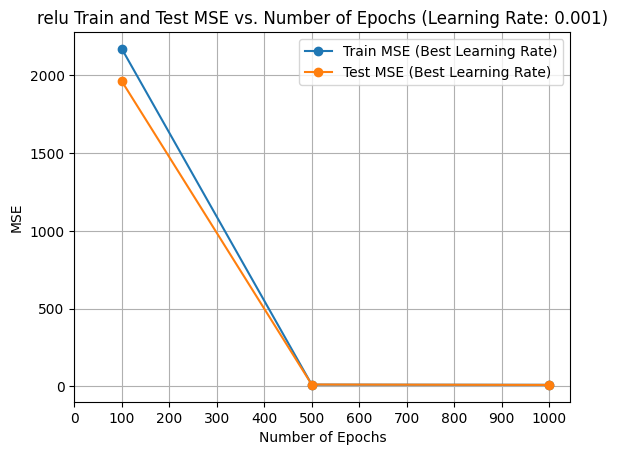

In [ ]:
# Extract the best learning rate
best_learning_rate = best_params['learning_rate']

# Find the index of the best learning rate in the learning_rate_range list
learning_rate_index = learning_rate_range.index(best_learning_rate)
start_index = learning_rate_index*len(iteration_range)

# Extract the train and test losses for the best learning rate at different number of epochs
# best_train_losses = train_losses[learning_rate_index::len(learning_rate_range)]
best_train_losses = train_losses[start_index:(start_index+3)]
print('best_train_MSE')
print(best_train_losses)
best_test_losses = test_losses[start_index:(start_index+3)]
print('best_test_MSE')
print(best_test_losses)

# Plotting the train and test losses for the best learning rate
plt.plot(iteration_range, best_train_losses, 'o-', label='Train MSE (Best Learning Rate)')
plt.plot(iteration_range, best_test_losses, 'o-', label='Test MSE (Best Learning Rate)')

plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title(activ[2]+f' Train and Test MSE vs. Number of Epochs (Learning Rate: {best_learning_rate})')
plt.legend()
plt.grid(True)

# Set grid lines on the x-axis for every 100 units
plt.xticks(range(0, iteration_range[-1]+1, 100))

# Save the image
plt.savefig(activ[2] + '.png', dpi=150, bbox_inches='tight')

plt.show()

### Time Calculation

In [ ]:
end_time = time.time()  # Record the ending time

execution_time = end_time - start_time

# Get the current UTC time
current_utc_time = datetime.now(pytz.utc)

# Set the desired time zone as 'America/Chicago' (Dallas)
desired_time_zone = pytz.timezone('America/Chicago')

# Convert the UTC time to the desired time zone
current_datetime = current_utc_time.astimezone(desired_time_zone)

print("Execution time: {:.2f} seconds".format(execution_time))
print("Current date and time:", current_datetime)
with open(log_file_path, 'a') as log_file:
    log_file.write(f'Execution time: {execution_time:.2f} seconds\n')
    log_file.write(f'Current date and time: {current_datetime}')

Execution time: 42.84 seconds
Current date and time: 2023-07-05 19:13:39.434763-05:00
